### Step 0
Load the energy data from the file `Energy Indicators.xls`, which is a list of indicators of [energy supply and renewable electricity production](Energy%20Indicators.xls) from the [United Nations](http://unstats.un.org/unsd/environment/excel_file_tables/2013/Energy%20Indicators.xls) for the year 2013, and should be put into a DataFrame with the variable name of **energy**.

Keep in mind that this is an Excel file, and not a comma separated values file. Also, make sure to exclude the footer and header information from the datafile. The first two columns are unneccessary, so you should get rid of them, and you should change the column labels so that the columns are:

`['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']`

Convert `Energy Supply` to gigajoules (there are 1,000,000 gigajoules in a petajoule). For all countries which have missing data (e.g. data with "...") make sure this is reflected as `np.NaN` values.

Rename the following list of countries (for use in later questions):

```"Republic of Korea": "South Korea",
"United States of America": "United States",
"United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
"China, Hong Kong Special Administrative Region": "Hong Kong"```

There are also several countries with numbers and/or parenthesis in their name. Be sure to remove these, 

e.g. 

`'Bolivia (Plurinational State of)'` should be `'Bolivia'`, 

`'Switzerland17'` should be `'Switzerland'`.

In [1]:
import pandas as pd    # import pandas library
import numpy as np     # import numpy library

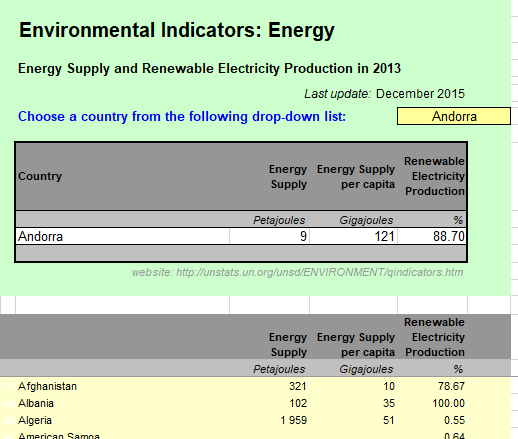

In [2]:
# load Excel data file and remove the header and footer
energy = pd.read_excel('data/Energy Indicators.xls', skiprows = 16, skipfooter=38)
# drop the first two columns as they are redundant
energy.drop(energy.columns[[0, 1]], axis=1, inplace=True)

In [3]:
# rename columns name
energy.columns = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']
#drop first row from data which contain units only
energy = energy.iloc[1:]

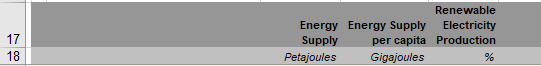

In [4]:
# replace missing data with np.NaN
energy = energy.replace('...', np.NaN)
# convert Energy Supply from Petajoules to Gigajoules
energy['Energy Supply'] = 1000000*energy['Energy Supply']

In [5]:
# remove the numbers and parenthesis from countries name
chg = {"Republic of Korea": "South Korea",
       "United States of America": "United States",
       "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
       "China, Hong Kong Special Administrative Region": "Hong Kong"}

energy['Country'] = energy['Country'].replace(chg, regex=True)
energy = energy.replace(regex={r'[0-9]':'',r' \(.*\)':''})

In [26]:
energy.sample(5)

,Country,Energy Supply,Energy Supply per Capita,% Renewable
192,Sri Lanka,3.880000e+08,19.0,59.57323
174,Saint Pierre and Miquelon,1.000000e+06,162.0,2.12766
148,Niger,8.700000e+07,5.0,0.00000
26,"Bonaire, Sint Eustatius and Saba",5.000000e+06,213.0,0.00000
198,Switzerland,1.113000e+09,136.0,57.74548


### Step 1
<br>

Next, load the GDP data from the file `world_bank.csv`, which is a csv containing countries' GDP from 1960 to 2015 from [World Bank](http://data.worldbank.org/indicator/NY.GDP.MKTP.CD). Call this DataFrame **GDP**. 

Make sure to skip the header, and rename the following list of countries:

```"Korea, Rep.": "South Korea", 
"Iran, Islamic Rep.": "Iran",
"Hong Kong SAR, China": "Hong Kong"```

<br>

In [6]:
#load world_bank.csv file
GDP = pd.read_csv('data/world_bank.csv', skiprows = 4)

In [7]:
# rename countries list in the world_bank file
chg = {"Korea, Rep.": "South Korea", 
       "Iran, Islamic Rep.": "Iran",
       "Hong Kong SAR, China": "Hong Kong"}

GDP['Country Name'] = GDP['Country Name'].replace(chg, regex=True)
# change Country name columnn name to Country
GDP = GDP.rename(columns = {'Country Name':'Country'})
GDP.head()

,Country,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Aruba,ABW,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.467704e+09,NaN,NaN,NaN,NaN,NaN
1,Andorra,AND,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,4.018196e+09,4.021331e+09,3.675728e+09,3.535389e+09,3.346317e+09,3.185605e+09,3.129538e+09,3.127550e+09,NaN,NaN
2,Afghanistan,AFG,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.030523e+10,1.172119e+10,1.214448e+10,1.469733e+10,1.593680e+10,1.691113e+10,1.935220e+10,1.973134e+10,1.999032e+10,2.029415e+10
3,Angola,AGO,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,5.581103e+10,6.842044e+10,7.787420e+10,7.975320e+10,8.247091e+10,8.570262e+10,9.012096e+10,9.626143e+10,1.008863e+11,1.039106e+11
4,Albania,ALB,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,9.771760e+09,1.034829e+10,1.112752e+10,1.150029e+10,1.192695e+10,1.223109e+10,1.240477e+10,1.254247e+10,1.279331e+10,1.312082e+10


### Step 2
Finally, load the [Sciamgo Journal and Country Rank data for Energy Engineering and Power Technology](http://www.scimagojr.com/countryrank.php?category=2102) from the file `scimagojr-3.xlsx`, which ranks countries based on their journal contributions in the aforementioned area. Call this DataFrame **ScimEn**.

In [8]:
#load scimagojr-3.xlsx file
ScimEn = pd.read_excel('data/scimagojr-3.xlsx')

In [9]:
# merge the full 3 tables on all values
# preparing tables for step 4
full_ds = pd.merge(energy, GDP, on = 'Country', how = 'outer')
full_ds = pd.merge(ScimEn, full_ds, on = 'Country', how = 'outer')
print(full_ds.shape)

# merge the 3 tables on common values
comm_df = pd.merge(energy, GDP, on = 'Country')
comm_df = pd.merge(ScimEn, comm_df, on = 'Country')
print(comm_df.shape)

(318, 70)
(162, 70)


### Step 3
Join the three datasets: GDP, Energy, and ScimEn into a new dataset (using the intersection of country names). Use only the last 10 years (2006-2015) of GDP data and only the top 15 countries by Scimagojr 'Rank' (Rank 1 through 15). 

The index of this DataFrame should be the name of the country, and the columns should be ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations',
       'Citations per document', 'H index', 'Energy Supply',
       'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015'].

*This step should yeild a DataFrame with 20 columns and 15 entries.*

In [10]:
# select specific columns from GDP
GDP = GDP[['Country','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']]

# select top 15 country from ScimEn
ScimEn = ScimEn[:15]
ScimEn.head(20)

,Rank,Country,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
0,1,China,127050,126767,597237,411683,4.70,138
1,2,United States,96661,94747,792274,265436,8.20,230
2,3,Japan,30504,30287,223024,61554,7.31,134
3,4,United Kingdom,20944,20357,206091,37874,9.84,139
4,5,Russian Federation,18534,18301,34266,12422,1.85,57
5,6,Canada,17899,17620,215003,40930,12.01,149
6,7,Germany,17027,16831,140566,27426,8.26,126
7,8,India,15005,14841,128763,37209,8.58,115
8,9,France,13153,12973,130632,28601,9.93,114
9,10,South Korea,11983,11923,114675,22595,9.57,104


In [11]:
# merge the three dataframes into one dataframe
df = pd.merge(energy, GDP, on = 'Country')
df = pd.merge(ScimEn, df, on = 'Country')

# set dataframe index as Country
df.set_index('Country', inplace = True)
print(df.shape)

(15, 20)


In [12]:
df.head(15)

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93.0,19.754910,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
United States,2,96661,94747,792274,265436,8.20,230,9.083800e+10,286.0,11.570980,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
Japan,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149.0,10.232820,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12
United Kingdom,4,20944,20357,206091,37874,9.84,139,7.920000e+09,124.0,10.600470,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12
Russian Federation,5,18534,18301,34266,12422,1.85,57,3.070900e+10,214.0,17.288680,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12
Canada,6,17899,17620,215003,40930,12.01,149,1.043100e+10,296.0,61.945430,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12
Germany,7,17027,16831,140566,27426,8.26,126,1.326100e+10,165.0,17.901530,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12
India,8,15005,14841,128763,37209,8.58,115,3.319500e+10,26.0,14.969080,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12
France,9,13153,12973,130632,28601,9.93,114,1.059700e+10,166.0,17.020280,2.607840e+12,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12


### Step 4
The previous question joined three datasets then reduced this to just the top 15 entries. When you joined the datasets, but before you reduced this to the top 15 items, how many entries did you lose?

*This step should yield a single number.*

In [13]:
# lost values = All existing values - Common values 
# to get all values use Full Outer Merge
# to get common values use inner Merge -default-
print(len(full_ds) - len(comm_df))

156


### Step 5

#### Answer the following questions in the context of only the top 15 countries by Scimagojr Rank 


What is the average GDP over the last 10 years for each country? (exclude missing values from this calculation.)

*This step should return a Series named `avgGDP` with 15 countries and their average GDP sorted in descending order.*

In [14]:
# get the avg of first 15 row, last 10 columns
# sort the values descendingly
avgGDP = df.iloc[0:15, 10:20].mean(axis = 1).sort_values(ascending = False)
type(avgGDP)

pandas.core.series.Series

In [27]:
avgGDP

Country
United States         1.536434e+13
China                 6.348609e+12
Japan                 5.542208e+12
Germany               3.493025e+12
France                2.681725e+12
United Kingdom        2.487907e+12
Brazil                2.189794e+12
Italy                 2.120175e+12
India                 1.769297e+12
Canada                1.660647e+12
Russian Federation    1.565459e+12
Spain                 1.418078e+12
Australia             1.164043e+12
South Korea           1.106715e+12
Iran                  4.441558e+11
dtype: float64

### Step  6
What is the mean `Energy Supply per Capita`?

*This step should return a single number.*

In [15]:
df['Energy Supply per Capita'].mean()

157.6

### Step 7
What country has the maximum % Renewable and what is the percentage?

*This step should return a tuple with the name of the country and the percentage.*

In [16]:
# find the index of max value and the max value
max_renewable = (df.idxmax()[0], "{:.2%}".format(df['% Renewable'].max()/100))
max_renewable

('Brazil', '69.65%')

### Step 8
Create a new column that is the ratio of Self-Citations to Total Citations. 
What is the maximum value for this new column, and what country has the highest ratio?

*This step should return a tuple with the name of the country and the ratio.*

In [17]:
def calc_ratio(self_citations, total_citations):
    """
    A function that takes two parameters:
    self_citations: number of self citations per country
    total_citations: sum of total citations for all countries
    
    return: ratio of self citations over total citations
    """
    return self_citations/total_citations

df['Self Citations ratio'] = calc_ratio(df['Self-citations'], df['Citations'].sum())

In [18]:
# return the index of highest value and the ratio of it.
max_citation = (df['Self Citations ratio'].idxmax(), df['Self Citations ratio'].max())
print(max_citation)
print("Highest Ratio Country: \033[4m{}\033[0m, With a Percentage of: {:.2%}".format(df['Self Citations ratio'].idxmax(), df['Self Citations ratio'].max()))

('China', 0.1360191815780727)
Highest Ratio Country: China, With a Percentage of: 13.60%


### Step 9
Create a new column with a 1 if the country's % Renewable value is at or above the median for all countries in the top 15, and a 0 if the country's % Renewable value is below the median.

*This step should return a series named `HighRenew` whose index is the country name sorted in ascending order of rank.*

In [19]:
# calculate median of the % Renewable for all countries
median = df['% Renewable'].median()
# compare each value in % Renewable to the median
df['HighRenew'] = df['% Renewable'].apply(lambda x: 1 if x >= median else 0)
df['HighRenew']

Country
China                 1
United States         0
Japan                 0
United Kingdom        0
Russian Federation    1
Canada                1
Germany               1
India                 0
France                1
South Korea           0
Italy                 1
Spain                 1
Iran                  0
Australia             0
Brazil                1
Name: HighRenew, dtype: int64

### Step 10
Use the following dictionary to group the Countries by Continent, then create a dateframe that displays the sample size (the number of countries in each continent bin), and the sum, mean, and std deviation for the estimated population of each country.

```python
ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
```

*This function should return a DataFrame with index named Continent `['Asia', 'Australia', 'Europe', 'North America', 'South America']` and columns `['size', 'sum', 'mean', 'std']`*

In [20]:
# group the Countries by Continent
ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}

In [21]:
# display number of countries in each bin
continent_df = pd.DataFrame(list(ContinentDict.items()), columns=['Country', 'Continent'])

#change the index of continents dataframe 
continent_df.set_index('Continent')

,Country
Continent,
Asia,China
North America,United States
Asia,Japan
Europe,United Kingdom
Europe,Russian Federation
North America,Canada
Europe,Germany
Asia,India
Europe,France


In [22]:
# calculate population for each country from Energy Supply per Capita
df['Population'] = df['Energy Supply']/df['Energy Supply per Capita']

In [23]:
# merge population and continent stats
continent_df = pd.merge(continent_df, df['Population'], on = 'Country')
# continent_df = continent_df.drop(['Population_x', 'Population_y'], axis = 1)

In [24]:
continent_df

,Country,Continent,Population
0,China,Asia,1.367645e+09
1,United States,North America,3.176154e+08
2,Japan,Asia,1.274094e+08
3,United Kingdom,Europe,6.387097e+07
4,Russian Federation,Europe,1.435000e+08
5,Canada,North America,3.523986e+07
6,Germany,Europe,8.036970e+07
7,India,Asia,1.276731e+09
8,France,Europe,6.383735e+07
9,South Korea,Asia,4.980543e+07


In [25]:
# calculate number of countries, sum, mean and std deviation for each continent population 
continent_df.groupby('Continent')['Population'].agg(['size', 'sum', 'mean', 'std'])

,size,sum,mean,std
Continent,,,,
Asia,5,2.898666e+09,5.797333e+08,6.790979e+08
Australia,1,2.331602e+07,2.331602e+07,NaN
Europe,6,4.579297e+08,7.632161e+07,3.464767e+07
North America,2,3.528552e+08,1.764276e+08,1.996696e+08
South America,1,2.059153e+08,2.059153e+08,NaN
